In [9]:
import pandas as pd
#importando a base de dados
funcionarios_df = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv(r'CadastroClientes.csv')
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)
display(funcionarios_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,Juliana Pereira da Rocha,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Yuri Gomes Ferreira,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Paulo César Ferreira dos Santos,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


## Valor Total da folha salarial

In [10]:
funcionarios_df['Valor Total Salarial'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios']
display(funcionarios_df)
valor_total = funcionarios_df['Valor Total Salarial'].sum()
print(valor_total)


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Valor Total Salarial
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,37247.0
1,2,Juliana Pereira da Rocha,5404,2702.0,1080.8,154,574.56,Logística,9186.8
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,27312.2
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36218.5
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,8666.6
...,...,...,...,...,...,...,...,...,...
109,143,Yuri Gomes Ferreira,10793,5396.5,2158.6,242,514.08,Logística,18348.1
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial,6881.6
111,148,Paulo César Ferreira dos Santos,24596,12298.0,4919.2,242,561.12,Administrativo,41813.2
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial,8632.6


2614343.3


In [11]:
servicos_df = pd.read_excel(r'BaseServiçosPrestados.xlsx')
clientes_df = pd.read_csv(r'CadastroClientes.csv', sep=';')
#mesclando as duas planilhas
servicos_df = servicos_df.merge(clientes_df, on='ID Cliente')
servicos_df = servicos_df.merge(funcionarios_df, on='ID Funcionário')
servicos_df['Faturamento Total'] = servicos_df['Tempo Total de Contrato (Meses)'] * servicos_df['Valor Contrato Mensal']
display(servicos_df)
display(funcionarios_df)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Cliente,Valor Contrato Mensal,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Valor Total Salarial,Faturamento Total
0,OS0001,67,1,14,Teixeira Gonçalves,540,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Financeiro,20491.8,7560
1,OS0002,17,2,12,Souza Santos,1260,Pedro Carrera,15718,7859.0,3143.6,176,628.32,Logística,26720.6,15120
2,OS0003,116,4,14,Santos Costa,2520,Bruno Cunha Felippe,21154,10577.0,4230.8,198,792.96,Logística,35961.8,35280
3,OS0004,37,5,8,Do Monteiro,3510,Marcos Almeida Albuquerque Faria,3398,1699.0,679.6,242,540.96,Financeiro,5776.6,28080
4,OS0005,130,6,8,Soares Lobo,2340,Mylena Pinheiro Mariano,5818,2909.0,1163.6,242,598.08,Comercial,9890.6,18720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,OS0233,111,315,4,Americo Bomfim,1575,Daniela Santos Silva,9367,4683.5,1873.4,198,554.40,Operações,15923.9,6300
233,OS0234,124,316,8,Manoel Costa,3690,Carolina Gonçalves Lixa Fontoura,12559,6279.5,2511.8,242,688.80,Comercial,21350.3,29520
234,OS0235,72,317,6,Gomes Machado,2385,Lucas Duarte,11867,5933.5,2373.4,264,524.16,Logística,20173.9,14310
235,OS0236,90,319,14,Pereira Fazenda,4185,Bruna Tavares Vasconcelos,12101,6050.5,2420.2,176,591.36,Administrativo,20571.7,58590


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Valor Total Salarial
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,37247.0
1,2,Juliana Pereira da Rocha,5404,2702.0,1080.8,154,574.56,Logística,9186.8
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,27312.2
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36218.5
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,8666.6
...,...,...,...,...,...,...,...,...,...
109,143,Yuri Gomes Ferreira,10793,5396.5,2158.6,242,514.08,Logística,18348.1
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial,6881.6
111,148,Paulo César Ferreira dos Santos,24596,12298.0,4919.2,242,561.12,Administrativo,41813.2
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial,8632.6


## Fatuamento Total

In [12]:
faturamento_total = servicos_df['Tempo Total de Contrato (Meses)'] * servicos_df['Valor Contrato Mensal']
print(faturamento_total.sum())

5519160


## Percentual de funcionários que fecharam contratos

In [13]:
#pegando o valor único sem duplicatas com o 'unique()'
qtd_func_contratos = len(servicos_df['ID Funcionário'].unique())
qtd_func_total = len(funcionarios_df['ID Funcionário'])
print('Percentual de funcionários que fecharam contratos {:.2%}'.format(qtd_func_contratos / qtd_func_total))

Percentual de funcionários que fecharam contratos 86.84%


## Quantidade de contratos por área

Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


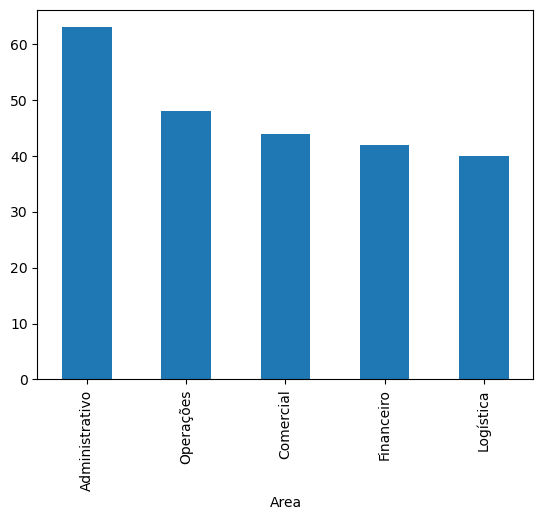

In [14]:
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
contratos_area_qtd = contratos_area_df['Area'].value_counts()

#plotando as informações em  um gráfico
contratos_area_qtd.plot.bar()
print(contratos_area_qtd)

## Quantidade de funcionários por área

Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


<Axes: ylabel='count'>

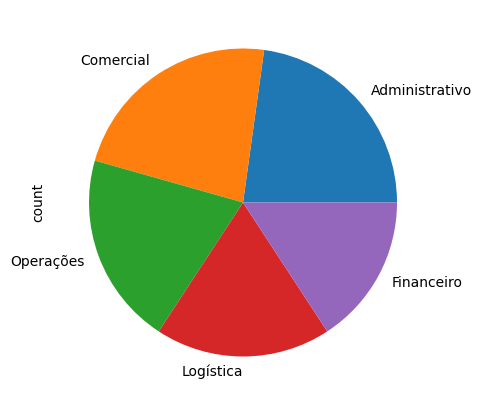

In [15]:
funcionarios_area = funcionarios_df['Area'].value_counts()
print(funcionarios_area)

#plotando a informação em um gráfico
funcionarios_area.plot.pie(figsize=(5, 5))

## Ticket Médio mensal

In [8]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('Valor total do Ticket Médio: R${:,.2f}'.format(ticket_medio))

Valor total do Ticket Médio: R$2,502.56
